<a href="https://colab.research.google.com/github/rymarinelli/Fire-Fly/blob/main/Streaming_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install mhyt
from mhyt import yt_download
import cv2
import numpy as np
import pandas as pd
import os
import h5py
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Input data files are available in the "../input/" directory

     |████████████████████████████████| 1.9MB 10.6MB/s 
     |████████████████████████████████| 26.9MB 173kB/s 


In [ ]:
forest_video = 'https://youtu.be/yZENXvTHkFM'
fire_video = "https://youtu.be/iHNKSp_qIDo"
test_video = "https://www.youtube.com/watch?v=UpHKfI7mqtA"



Block below will split video selected into frames.
You need to assign the url to a variable like in the above

In [ ]:
yt_download(test_video,"download.mp4")

download https://www.youtube.com/watch?v=UpHKfI7mqtA in format mp4 to file download.mp4
[youtube] UpHKfI7mqtA: Downloading webpage
[youtube] UpHKfI7mqtA: Downloading MPD manifest
[download] Destination: download.mp4
[download] 100% of 8.65MiB in 00:00
Done downloading, now converting ...


In [ ]:
#!rm -r input/
! mkdir input


In [ ]:
vidcap = cv2.VideoCapture('download.mp4')

In [ ]:

success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/input/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1
  #saving ram 
  if count > 100:
    break



Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
total_frames = 1899
vid_time = 405
vid_rate = total_frames/vid_time 
#Every second there are about 5 frames
print(vid_rate)

4.688888888888889


In [ ]:
from google.colab import files
files.upload()

Saving Model.json to Model.json


{'Model.json': b'{"class_name": "Functional", "config": {"name": "Inception_based_model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 300, 300, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": false, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2d", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization",

In [ ]:
from google.colab import files
files.upload()

Saving Weights.h5 to Weights.h5


In [ ]:
json_file = open('/content/Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = keras.models.model_from_json(loaded_model_json)
model.load_weights("/content/Weights.h5")
# load weights into new model

In [ ]:
import cv2 as cv
X, Y = [], []
img_size= (300, 300)
for root,_,files in os.walk("/content/input"):
    for file in files:
        x = cv.imread(os.path.join(root, file))
        if(x is None):
            print(file)
            continue
        x = cv.resize(x, img_size, interpolation=cv.INTER_AREA)
        X.append(x/255.0)
        Y.append(1)
  
       

In [ ]:
X = np.stack(X)
results = model.predict(X)
for i in results:
  print(i[0])

ValueError: ignored

Plotting Frame Rate Over Time 

Text(0.5, 1.0, 'Model Predictions Over Frames')

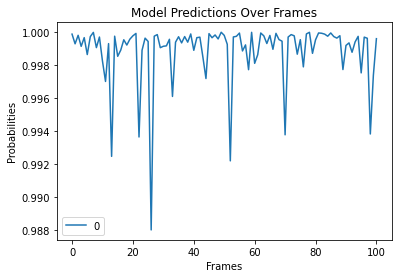

In [ ]:
import plotly.express as px

rate_list = list()
for i in results:
  rate_list.append(i)

df = pd.DataFrame(rate_list)
ax = df.plot.line()
ax.set_xlabel("Frames")
ax.set_ylabel("Probabilities")
ax.set_title('Model Predictions Over Frames')
